# Life Expectancy And GPD

## Given as .csv file containing data involving life expectancies and GDPs of countries can we:

1. See if there's a correlation between life expectancy and GDP
2. Do certain countries have a higher life expectancy?
    * If so is their GDP also higher?
3. Has life expectancy and/or GDP increased over time?
4. What is the average life expectancy across the nations included?
5. What is the distribution of that life expectancy? 

In [1]:
# To start we need to import the libraries that we'll use
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Next we'll load our data

life_expectancy_gdp = pd.read_csv('all_data.csv')

In [3]:
# We need to examine it to make sure that it was properly loaded, as well as to get a feel for what it looks like.

print(life_expectancy_gdp.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
# Looking at the column names, maybe we want to rename some of them. 

life_expectancy_gdp.rename(columns={
    'Life expectancy at birth (years)' : 'Life_expectancy'
}, inplace=True)

print(life_expectancy_gdp.head())

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Before we can answer our questions about life expectancy and GDP, we should explore.

1. How many countries are represented? (We can only see Chile currently.)
2. How many years are present? (We can only see 5 currently.)

In [5]:
# To see how many countries are represented in our data we can use .unique (to see which Countries by name)

print(life_expectancy_gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [6]:
# The same method can be used to see how many years we have collected data for.

print(life_expectancy_gdp.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Since we have some basic information about what our dataframe holds, let's visualize some of it.

1. What's the distribution of the GDP?
2. What's the distribution of life expectancy?

Text(0.5, 1.0, 'Distribution of GDP Amongst Six Countries')

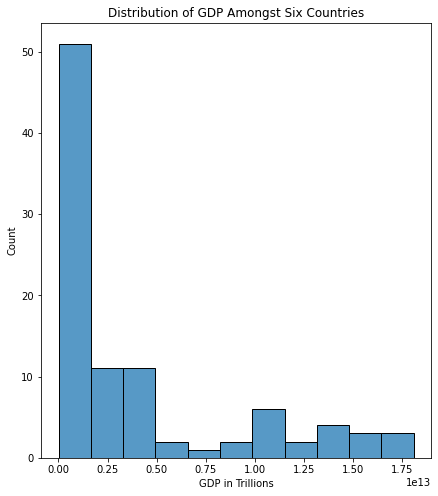

In [7]:
# We can create a figure and plot a histogram to get a distribution of either GDP or life expectancy.
# we'll start with GDP.

plt.figure(figsize=(7, 8))

sns.histplot(data=life_expectancy_gdp, x='GDP')
plt.xlabel('GDP in Trillions')
plt.title('Distribution of GDP Amongst Six Countries')

Text(0.5, 1.0, 'Distribution of Life Expectancy Amongst Six Countries')

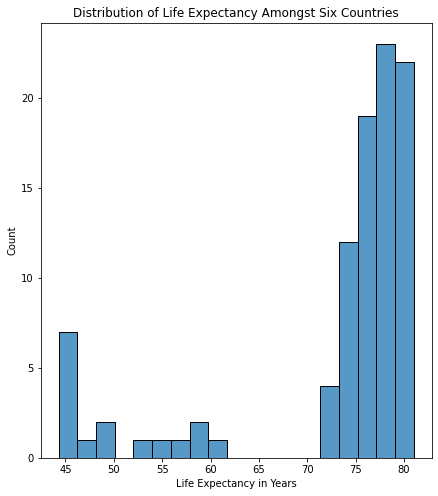

In [8]:
# We will do the same thing to see the distribution of life expectancy

plt.figure(figsize=(7, 8))

sns.histplot(data=life_expectancy_gdp, x='Life_expectancy')
plt.xlabel('Life Expectancy in Years')
plt.title('Distribution of Life Expectancy Amongst Six Countries')

It looks like the GDP distribution is right-skewed, while the life expectancy distribution is more left-skewed. 
This does not, however, tell us how they relate at all. These are independent of one another. 

## Let's go back to our questions from the beginning. 

1. Is there a correlation between life expectancy and GDP?
2. Do certain countries have a higher life expectancy?
    * If so is their GDP also higher?
3. Has life expectancy and/or GDP increased over time?
4. What is the average life expectancy across the nations included?
5. What is the distribution of that life expectancy? 

Text(0, 0.5, 'GDP in Trillions')

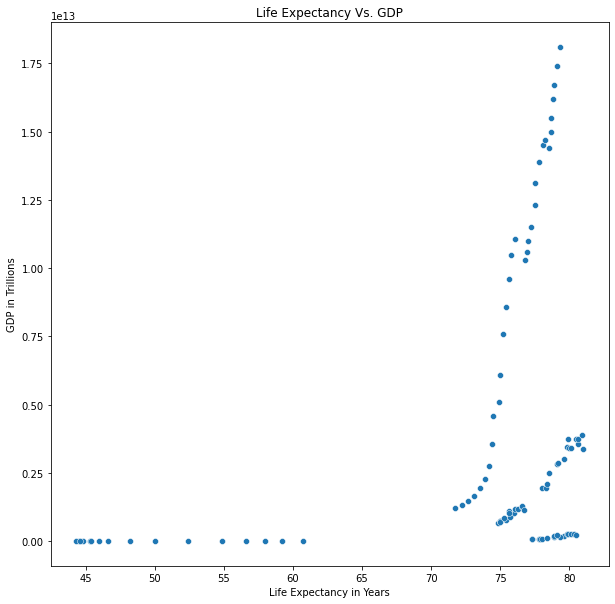

In [9]:
# To start with the first question, let's make a scatterplot of life expectancy and GDP.

plt.figure(figsize=(10, 10))

sns.scatterplot(x='Life_expectancy', y='GDP', data=life_expectancy_gdp)
plt.title('Life Expectancy Vs. GDP')
plt.xlabel('Life Expectancy in Years')
plt.ylabel('GDP in Trillions')

Text(0, 0.5, 'GDP in Trillions')

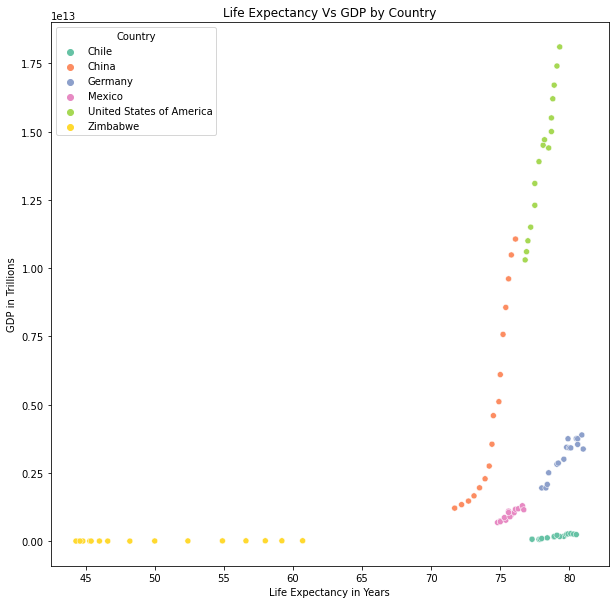

In [10]:
# The above plot does show that there is a positive correlation, as GDP increases so does life expectancy. 
# However, we can't see which countries are which. We can either add a hue and pass in 'Country' or 
# plot separate plots.

plt.figure(figsize=(10, 10))

sns.scatterplot(x='Life_expectancy', y='GDP', data=life_expectancy_gdp, hue='Country', palette='Set2')
plt.title('Life Expectancy Vs GDP by Country')
plt.xlabel('Life Expectancy in Years')
plt.ylabel('GDP in Trillions')

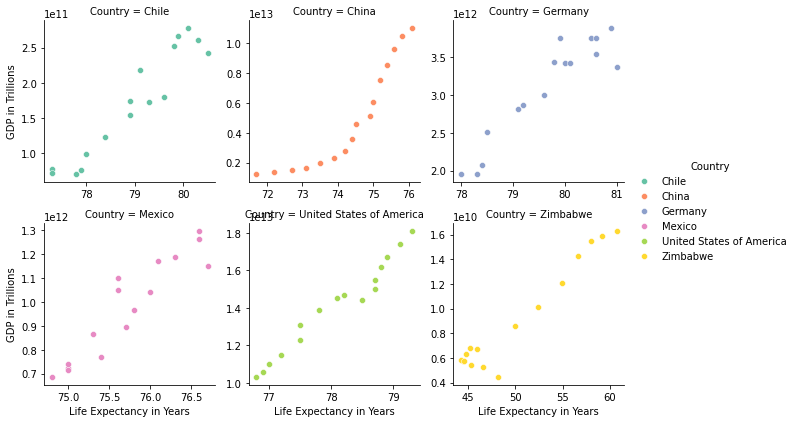

In [11]:
# Great! We can see every county's GDP and life expectancy. 
# However it's not a great comparison of the two by country.  There are clusters that make it hard to compare.
# Let's try to group separate plots to compare GDP and life expectancy by country.


graph = sns.FacetGrid(data=life_expectancy_gdp, col='Country', col_wrap = 3, hue='Country', sharex=False, sharey=False, palette='Set2')
graph = (graph.map(sns.scatterplot, 'Life_expectancy', 'GDP')
            .add_legend()
            .set_axis_labels('Life Expectancy in Years', 'GDP in Trillions'))


1. Is there a correlation between GDP and life expectancy?
    The clustered scatterplots above do all have a positive correlation (from bottom left to upper right), which
    leads me to believe that there is indeed a correlation between the two.

2. Do certain countries have a higher life expectancy?
    * If so is their GDP also higher?

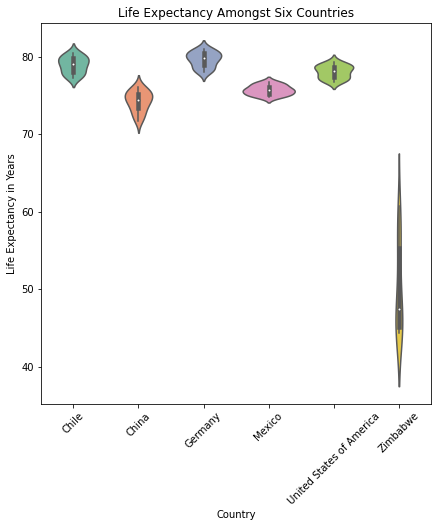

In [12]:
# Let's compare life expectancy amongst our countries using violinplots.


plt.figure(figsize=(7, 7))
sns.violinplot(x='Country', y='Life_expectancy', data=life_expectancy_gdp, palette='Set2')
plt.title('Life Expectancy Amongst Six Countries')
plt.ylabel('Life Expectancy in Years')
plt.tick_params('x', rotation=45)



So we can see that average life expectancy is higher in all countries except for Zimbabwe. Germany seems to have the
highest average. Zimbabwe has the largest overall spread.

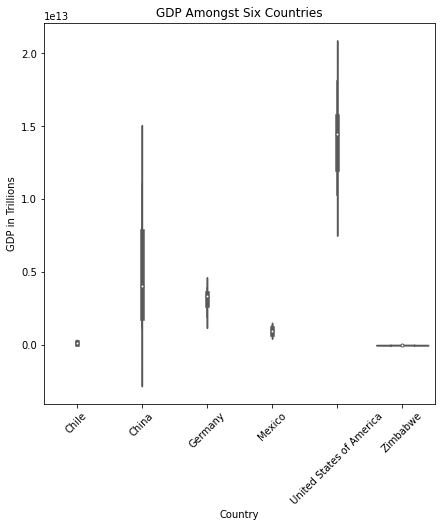

In [13]:
# Let's do the same for GDP.

plt.figure(figsize=(7, 7))
sns.violinplot(x='Country', y='GDP', data=life_expectancy_gdp, palette='Set2')
plt.title('GDP Amongst Six Countries')
plt.ylabel('GDP in Trillions')
plt.tick_params('x', rotation=45)

This time it looks like the United States has the highest average and highest overall. However China may have the greatest spread. China and Zimbabwe look like they're close as far as average goes, with China having a greater range.

Text(0.5, 0, 'Life Expectancy in Years')

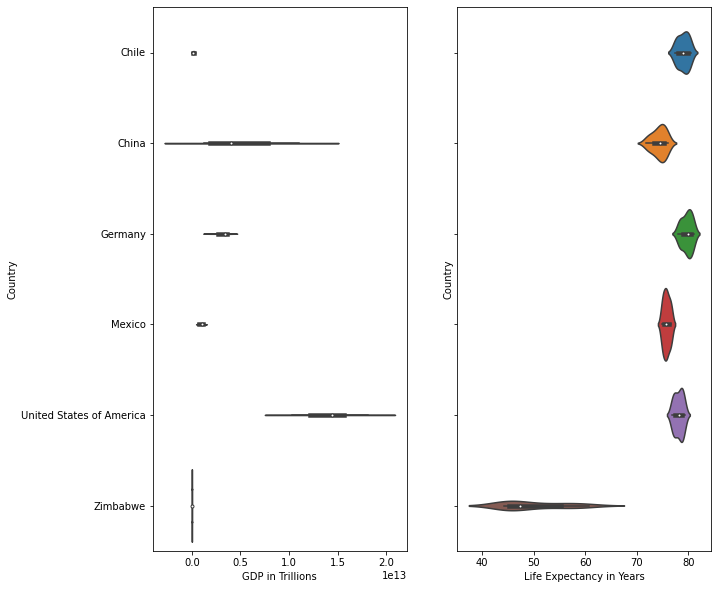

In [14]:
# Let's try to get these two plots together.

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 10))

axes[0] = sns.violinplot(ax=axes[0], x=life_expectancy_gdp.GDP, y=life_expectancy_gdp.Country, palette='Set2')
axes[0].set_xlabel('GDP in Trillions')

axes[1] = sns.violinplot(ax=axes[1], x=life_expectancy_gdp.Life_expectancy, y=life_expectancy_gdp.Country, palette='Set2')
axes[1].set_xlabel('Life Expectancy in Years')

While these are great for finding averages and spreads, let's get another visualization to compare each country's GDP and life expectancy separately.

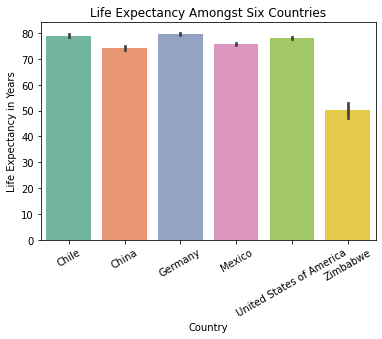

In [15]:
# Barplots are nice ways to see how each country compares to one another.

sns.barplot(x='Country', y='Life_expectancy', data=life_expectancy_gdp, palette='Set2')
plt.title('Life Expectancy Amongst Six Countries')
plt.ylabel('Life Expectancy in Years')
plt.tick_params('x', rotation=30)

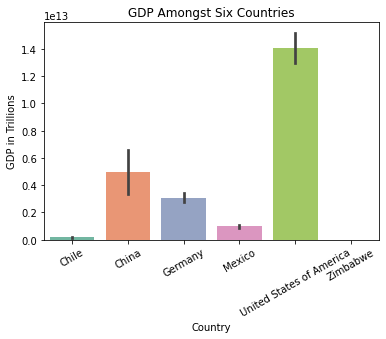

In [16]:
sns.barplot(x='Country', y='GDP', data=life_expectancy_gdp, palette='Set2')
plt.title('GDP Amongst Six Countries')
plt.ylabel('GDP in Trillions')
plt.tick_params('x', rotation=30)

It looks like life expectancy is pretty even amongst the countries, with the exception of Zimbabwe which is signfigicantly lower than the other five. In terms of GDP, it looks like the United States is significantly higher than the other five countries with China being the next highest.

3. Has life expectancy and/or GDP increased over time?

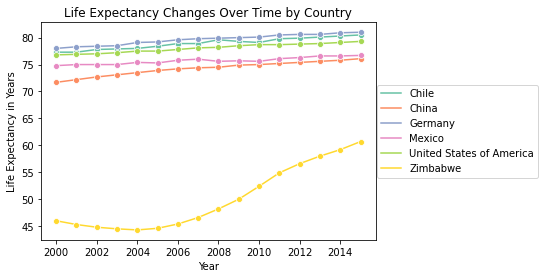

In [17]:
# A line plot should be able to show us how life expectancy and GDP have changed over time in our countries

sns.lineplot(x='Year', y='Life_expectancy', hue='Country', data=life_expectancy_gdp, palette='Set2', marker='o')
plt.title('Life Expectancy Changes Over Time by Country')
plt.ylabel('Life Expectancy in Years')
plt.legend(loc=7, bbox_to_anchor=(1.5, 0.5))


Oeverall it looks like every country did have a rise in their life expectancy as time passed. Zimbabwe's was the most significant overall. China's was also quite noticeable, even thought it was not as dramatic. Mexico had a slight drop but then rose again.

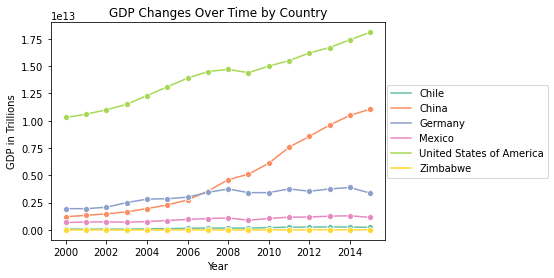

In [18]:
sns.lineplot(x='Year', y='GDP', hue='Country', data=life_expectancy_gdp, palette='Set2', marker='o')
plt.title('GDP Changes Over Time by Country')
plt.ylabel('GDP in Trillions')
plt.legend(loc=7, bbox_to_anchor=(1.5, 0.5))

It looks like the United States and China both had significant growth of their GDP over the years. Germany had a rise but then a decline towards the middle of the 2010's. Both Chile and Zimbabwe's seem to be pretty stagnant (let's explore that further).

Text(0, 0.5, 'GDP in Trillions')

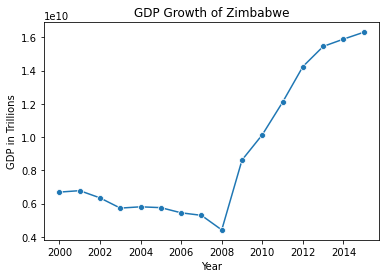

In [29]:
Zimbabwe_data = life_expectancy_gdp[life_expectancy_gdp.Country == 'Zimbabwe']

sns.lineplot(x='Year', y='GDP', data=Zimbabwe_data, marker='o')
plt.title('GDP Changes of Zimbabwe')
plt.ylabel('GDP in Trillions')


Text(0, 0.5, 'GDP in Trillions')

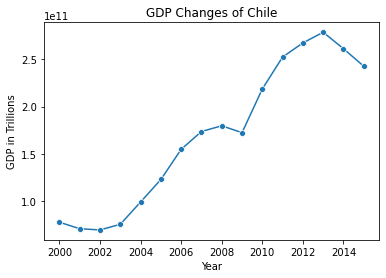

In [31]:
Chile_data = life_expectancy_gdp[life_expectancy_gdp.Country == 'Chile']

sns.lineplot(x='Year', y='GDP', data=Chile_data, marker='o')
plt.title('GDP Changes of Chile')
plt.ylabel('GDP in Trillions')

We can now see that both Zimbabwe and Chile did experience growth in their GDP like the other countries that were included. Chile, however seems to have had a decline around the middle of the 2010's like Germany.

4. What is the average life expectancy across the nations included?
5. What is the distribution of that life expectancy?

## This has already been answered above in a way with the distribution that was plotted. However we can also show the average here. 

### We will also throw in the previous plot for GDP and show the average there as well.

Text(0.5, 1.0, 'Distribution of Life Expectancy Amongst Six Countries')

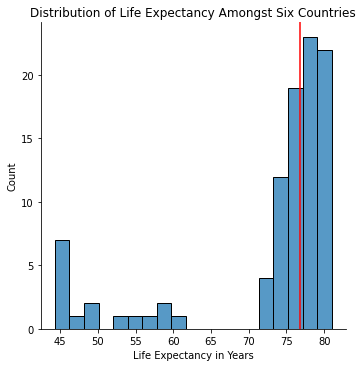

In [21]:
sns.displot(data=life_expectancy_gdp, x='Life_expectancy')
plt.axvline(np.median(life_expectancy_gdp.Life_expectancy), color='red')
plt.xlabel('Life Expectancy in Years')
plt.title('Distribution of Life Expectancy Amongst Six Countries')

We can see again that the data is left-skewed. But this time we can also see that the average life expectancy is about 77 years.

Text(0.5, 1.0, 'Distribution of GDP Amongst Six Countries')

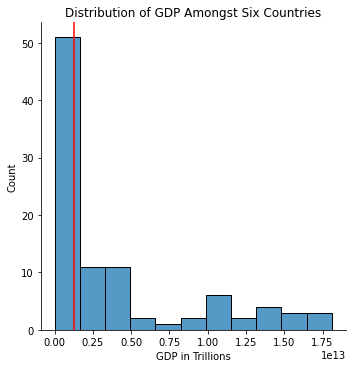

In [22]:
sns.displot(data=life_expectancy_gdp, x='GDP')
plt.axvline(np.median(life_expectancy_gdp.GDP), color='red')
plt.xlabel('GDP in Trillions')
plt.title('Distribution of GDP Amongst Six Countries')

Again we can see that the distribution is right-skewed. However, we can now see that the average is about 0.1 trillion dollars. 

## Conclusions

### We have learned that GDP and life expectancy are linked.
### Germany has the highest average life expectancy. 
### Zimbabwe has the greatest spread of life expectancies.
### The United States has the highest overall GDP.
### All six countries saw a rise in life expectancy as well as their GDPs over the years. 